# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [2]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

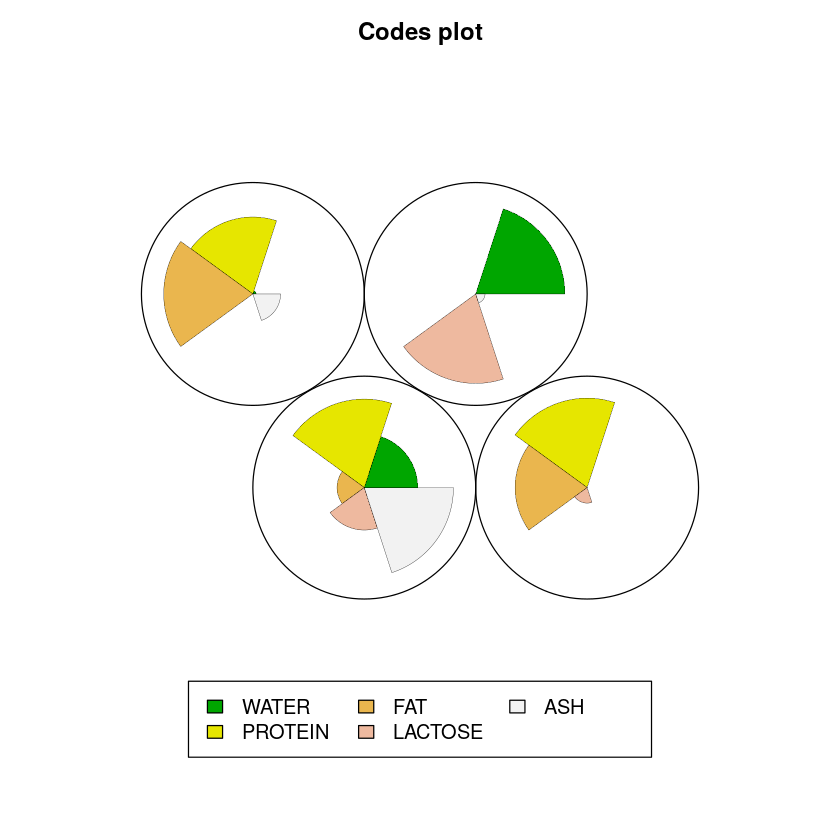

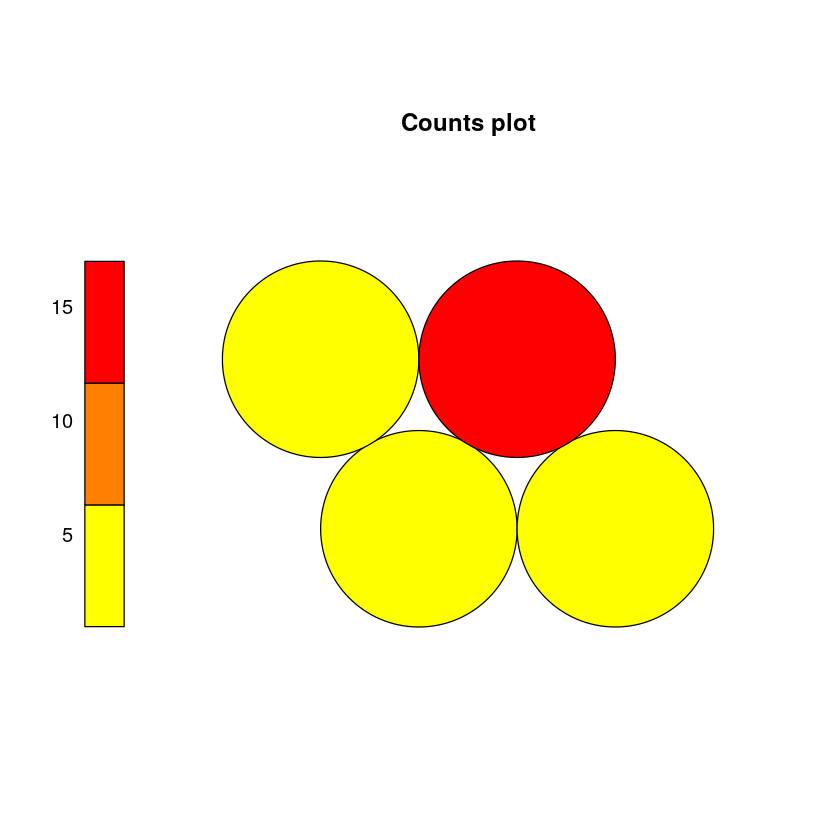

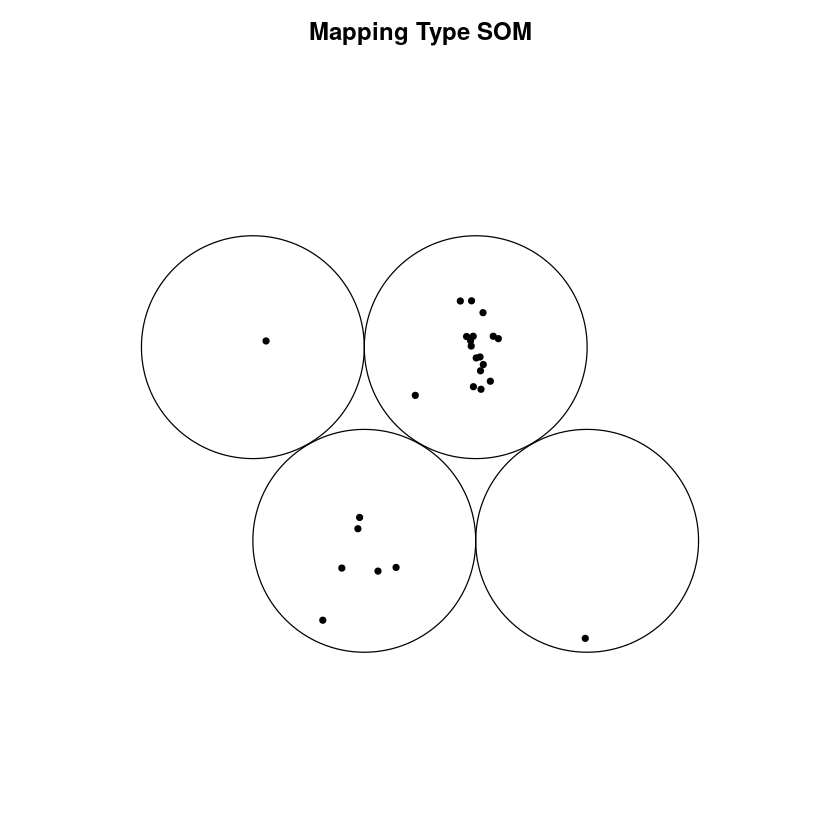

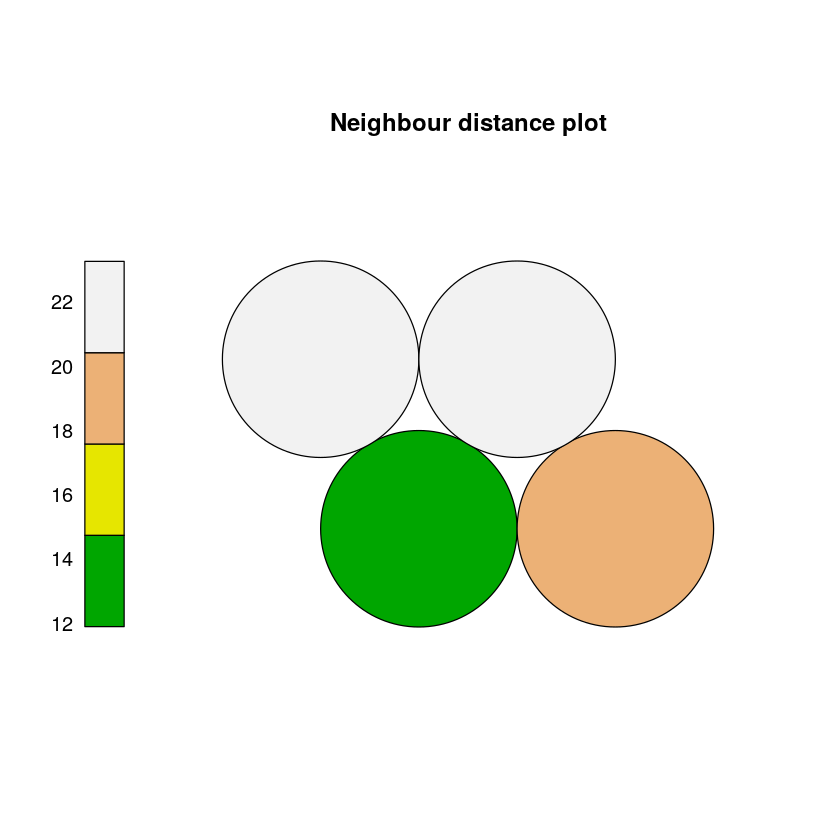

In [8]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

a) Este algoritomo funciona como una red auto-organizada la cual debe descubrir rasgos comunes entre  los datos de entrada (midiendo distancia entre vectores), e incorporarlos a su estructura interna de conexiones. En este caso se le pasan los datos de nuestro dataset milk1.dat y se define un espacio bidimencional cada componente de forma hexagonal es decir cada dato se comparará con sus 6 vecinos más cercanos. El resultado es un mapeo de los datos que más se parecen entre ellos.

b) En este caso se divide la grilla es un espacio de 4x4 con componentes rectangulares y se puede observar que en algunos un espacio de la grilla no hay nungun dato. Por lo que se puede deducir que es muy amplio el rango y se desperdician rasgos que pueden agrupar datos. También puede implicar el hecho de que las rejillas sean rectangular y no hexagonales, ya que con este ultimo hay más mediciones entre los datos.

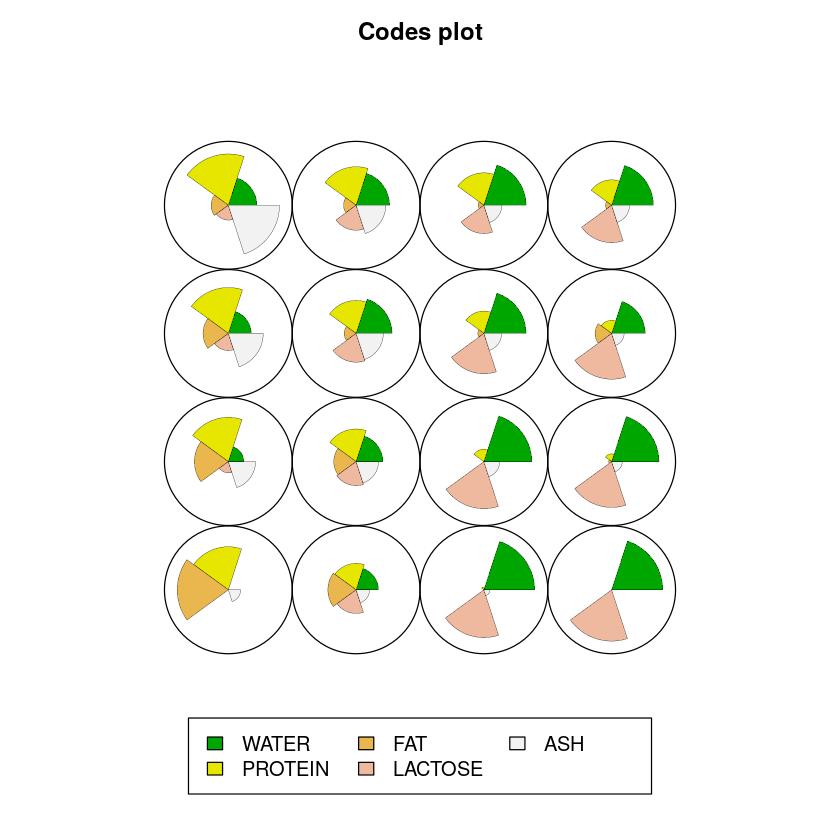

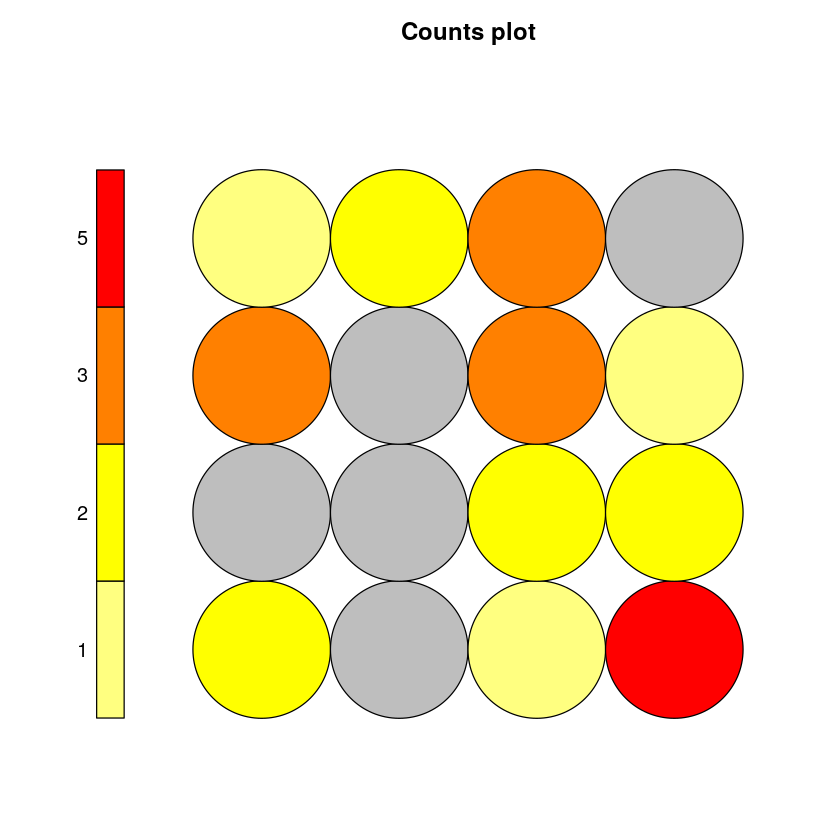

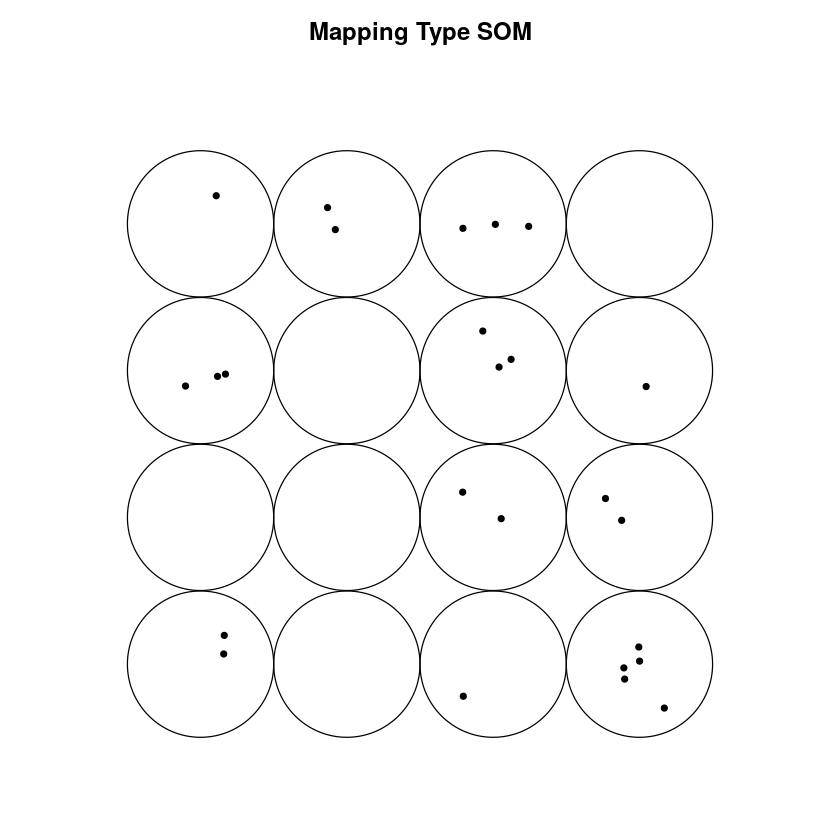

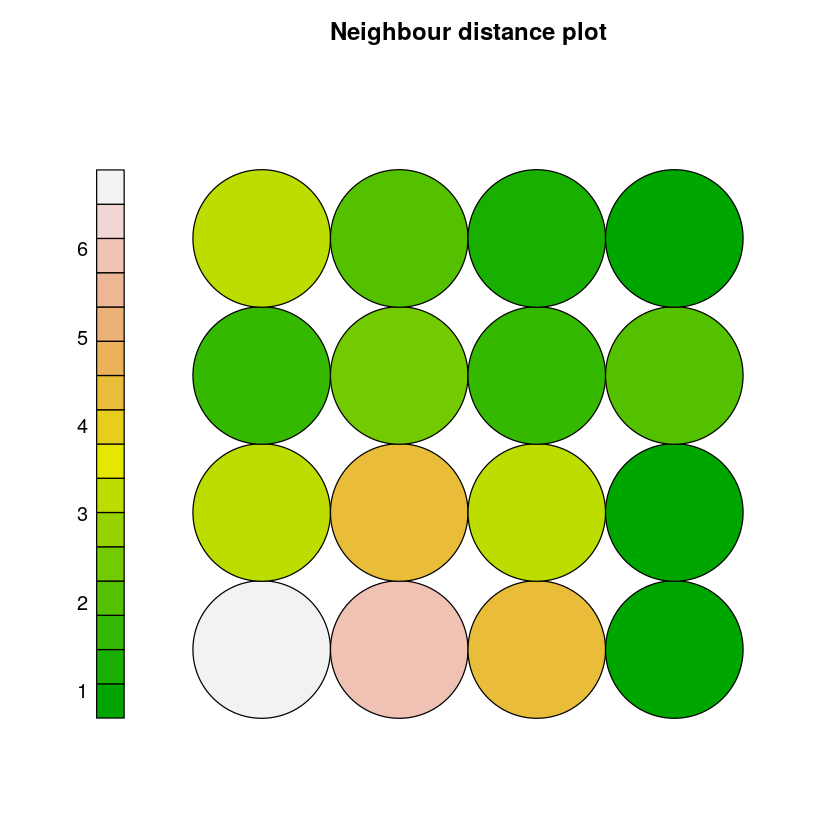

In [27]:
sommap <- som(scale(datos), grid = somgrid(4, 4, "rectangular"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


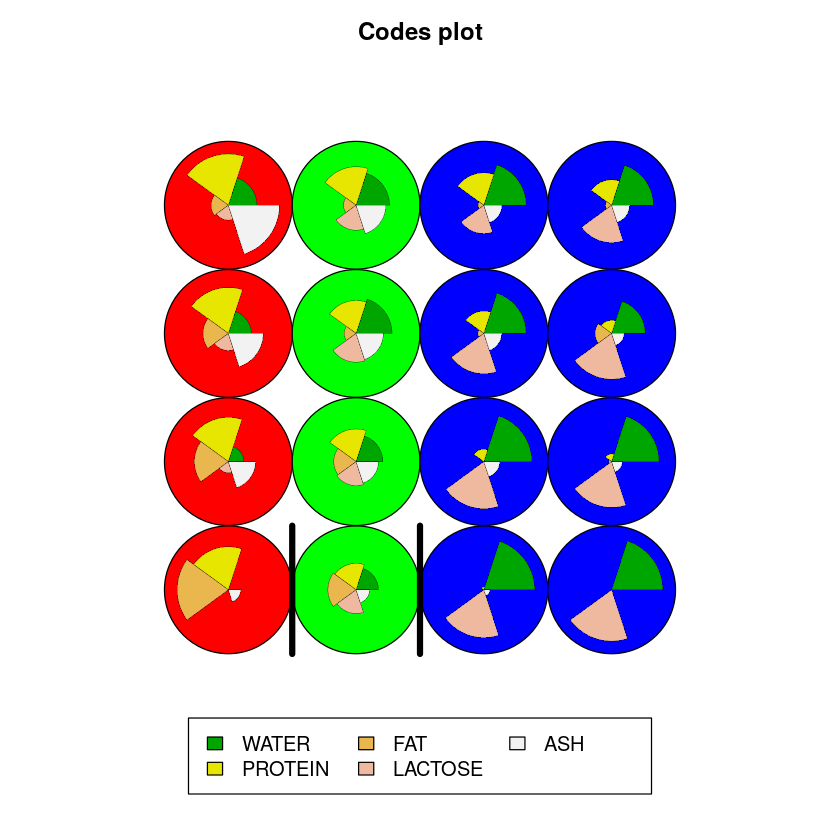

In [28]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 
a) Explique como funciona esta nueva visualización.
b) Interprete y comente los resultados obtenidos. 

a) En este caso se definen las columnas y filas de la grilla, además se define el número de grupos. 

b) Ahora la visualización cambió dando sentido con colores a los grupos que son similares. como en el ejemplo anterior la primera columan es distinta a la segunda y la tercera y cuarta son similares por eso estan del mismo color.

Ejercicio 3: 
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección
b) Realice las estimaciones y discuta sus resultados.

a) Elegí el set de datos de iris ya que podre ver bien la separación entre los tipos de flotes, segun sus características.

In [32]:
iris <-read.csv("Iris.csv",sep=",",header=TRUE)
x<-iris[2:5]
x

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


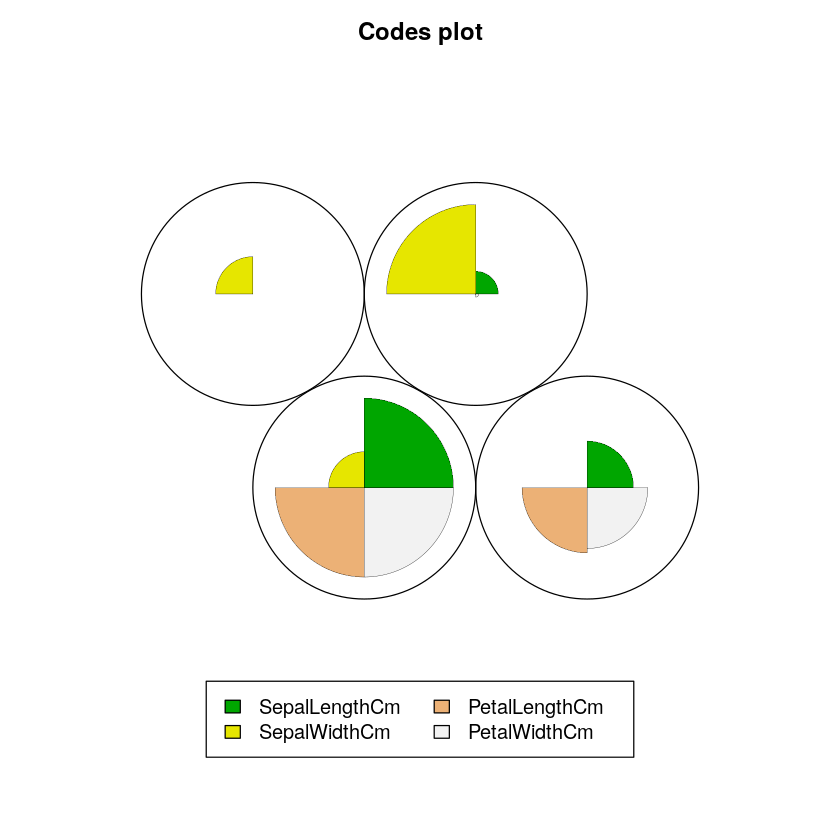

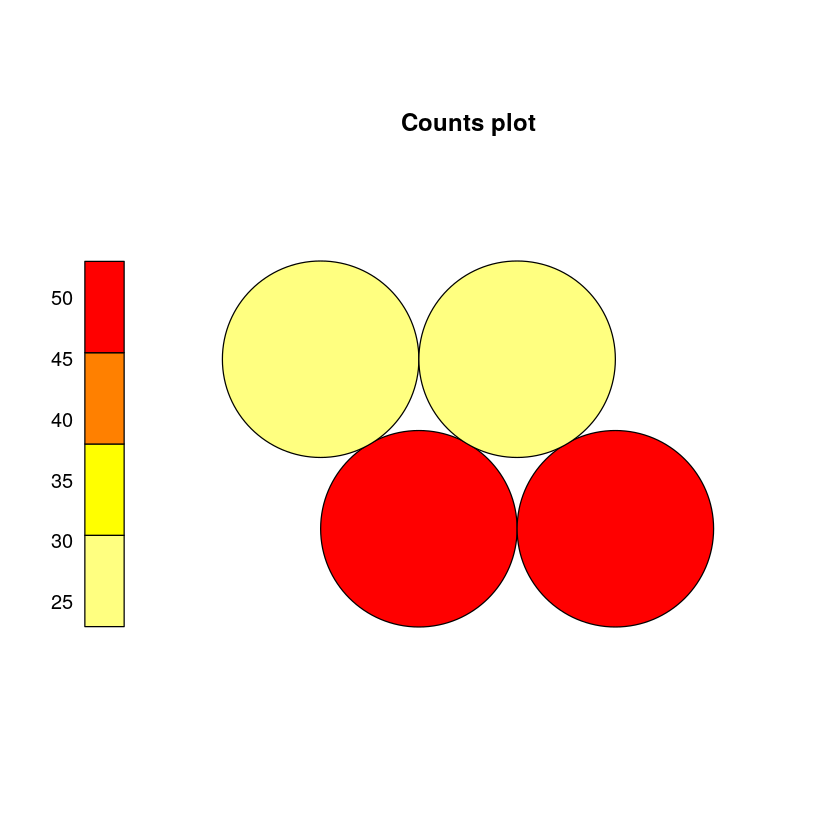

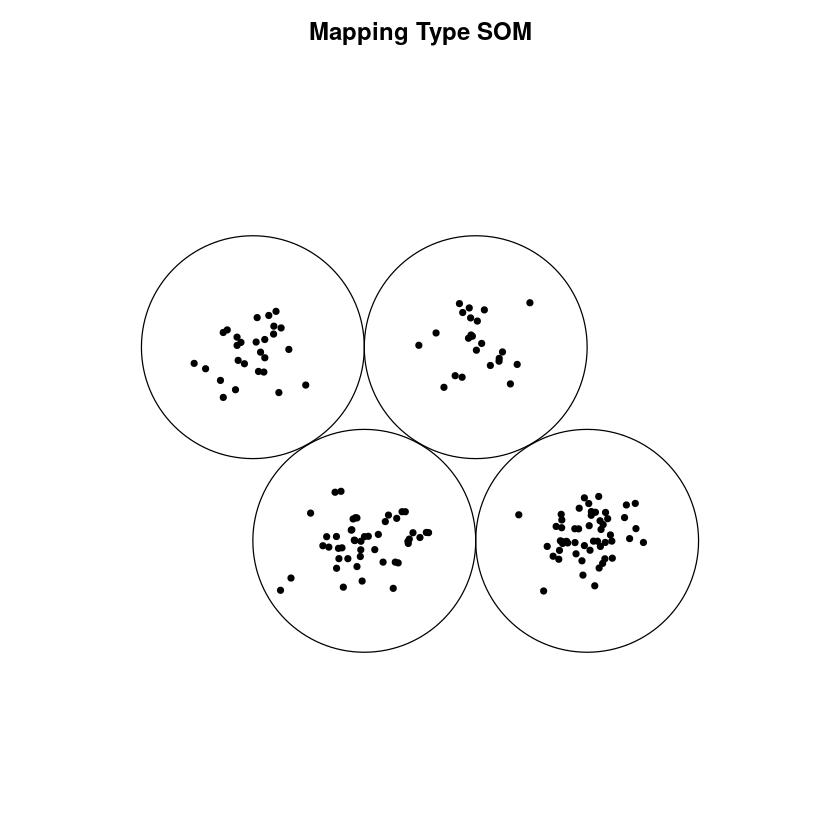

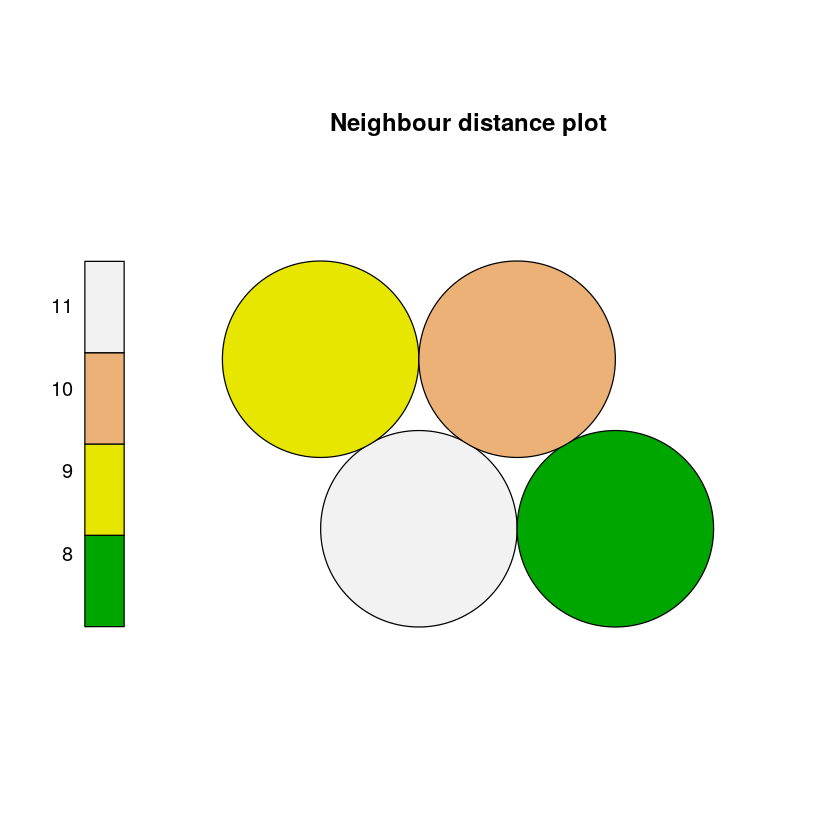

In [33]:
sommap <- som(scale(x), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

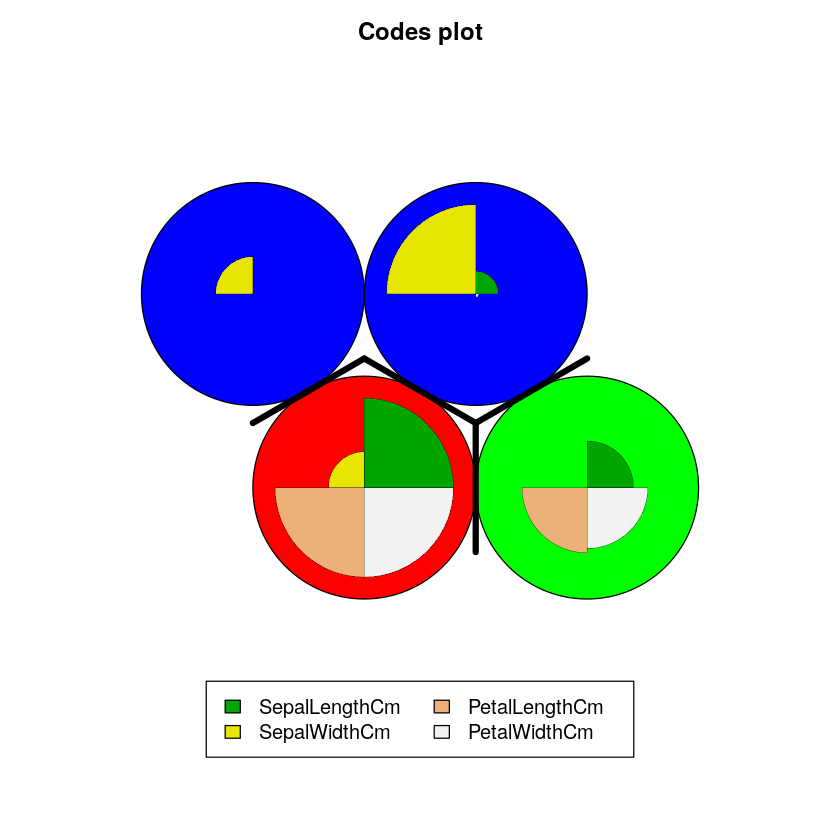

In [34]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])
add.cluster.boundaries(sommap, som.hc)

Se nota claramente que existen tres grupos de flores. Y que el peso de los vectores es considerable en cada uno de ellos.